In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report


In [ ]:
# Question 3
# Part I-III

# import data and reset col names 
data = pd.read_csv('/content/car.data')
data.columns=['buying', 'maint', 'doors', 'persons', 'lug boot', 'safety', 'label']

data.head()

,buying,maint,doors,persons,lug boot,safety,label
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
# Question 3
# Part IV: loading

# create copy of original dataframe 
data_numeric = data.copy()
# convert dataframe copy to numerical data type 
data_numeric['buying'] = pd.Categorical(data_numeric['buying']).codes
data_numeric['maint'] = pd.Categorical(data_numeric['maint']).codes
data_numeric['doors'] = pd.Categorical(data_numeric['doors']).codes
data_numeric['persons'] = pd.Categorical(data_numeric['persons']).codes
data_numeric['lug boot'] = pd.Categorical(data_numeric['lug boot']).codes
data_numeric['safety'] = pd.Categorical(data_numeric['safety']).codes 
data_numeric['label'] = pd.Categorical(data_numeric['label']).codes
# confirm data types of each col 
data_numeric.head()
#data_numeric.info()

,buying,maint,doors,persons,lug boot,safety,label
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


Text(0.5, 1.0, 'Label')

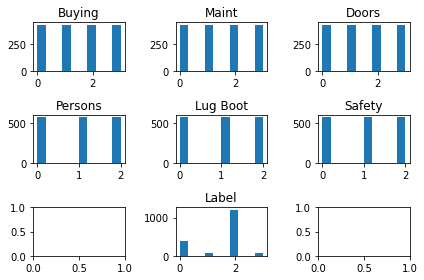

In [ ]:
# Question 3 
# Part V: visualization

fig, axes = plt.subplots(3, 3, sharex=False, sharey= False, tight_layout=True)

axes[0,0].hist(x=data_numeric['buying'])
axes[0,0].set_title('Buying')
axes[0,1].hist(x=data_numeric['maint'])
axes[0,1].set_title('Maint')
axes[0,2].hist(x=data_numeric['doors'])
axes[0,2].set_title('Doors')
axes[1,0].hist(x=data_numeric['persons'])
axes[1,0].set_title('Persons')
axes[1,1].hist(x=data_numeric['lug boot'])
axes[1,1].set_title('Lug Boot')
axes[1,2].hist(x=data_numeric['safety'])
axes[1,2].set_title('Safety')
axes[2,1].hist(x=data_numeric['label'])
axes[2,1].set_title('Label')

In [ ]:
# Question 3 
# Part VI: training/test split 

# split data into X and y 
X = data_numeric.iloc[:,0:6]
y = data_numeric.iloc[:,-1]

# split training/test data 80:20 using sklearn 
car_train_X, car_test_X, car_train_y, car_test_y = train_test_split(X, y, test_size=0.2, random_state=42)


[Text(125.55000000000001, 190.26, 'X[3] <= 0.5\nentropy = 1.19\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 458\nvalue = [0, 0, 458, 0]'),
 Text(167.4, 135.9, 'X[5] <= 0.5\nentropy = 1.46\nsamples = 923\nvalue = [307, 54, 514, 48]'),
 Text(83.7, 81.53999999999999, 'X[0] <= 2.5\nentropy = 1.644\nsamples = 302\nvalue = [165, 20, 69, 48]'),
 Text(41.85, 27.180000000000007, 'entropy = 1.639\nsamples = 225\nvalue = [127, 20, 30, 48]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 1.0\nsamples = 77\nvalue = [38, 0, 39, 0]'),
 Text(251.10000000000002, 81.53999999999999, 'X[5] <= 1.5\nentropy = 1.061\nsamples = 621\nvalue = [142, 34, 445, 0]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.0\nsamples = 308\nvalue = [0, 0, 308, 0]'),
 Text(292.95, 27.180000000000007, 'entropy = 1.387\nsamples = 313\nvalue = [142, 34, 137, 0]')]

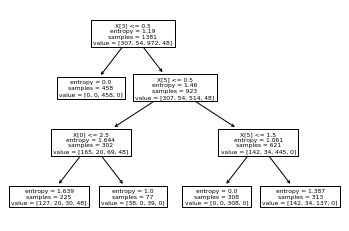

In [ ]:
# Question 3 
# Part VII: train classification model 

# instantiate decision tree
tree_reg = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state=42)
# train tree
tree_reg = tree_reg.fit(car_train_X, car_train_y) 


# print model output (as requested)
tree.plot_tree(tree_reg) 

In [ ]:
# Question 3 
# Part VIII: Make predictions 

# Generate predicted classes using the model object on the training set 'car_train'
train_prediction = tree_reg.predict(car_train_X)

# Generate predicted classes using the model object on the testing set 'car_test'
test_prediction = tree_reg.predict(car_test_X)

# Generate predicted probabilities for classes using the model object on the 
# training set 'car_train': return the probability of a predicted class, 
# calculated by the fraction of samples of the same class in a leaf.)
train_prediction_prob = tree_reg.predict_proba(car_train_X)

# Generate predicted probabilities for classes using the model object on the 
# testing set 'car_test' 
test_prediction_prob = tree_reg.predict_proba(car_test_X)


In [ ]:
# Question 3 
# Part IX: evaluate model 

# Calculate the accuracy score for the train set 'car_train'
train_accuracy = accuracy_score(train_prediction, car_train_y)
print('Decision tree training accuracy:', train_accuracy)

# Calculate the accuracy score for the test set 'car_test'
test_accuracy = accuracy_score(test_prediction, car_test_y)
print('Decision tree testing accuracy: ', test_accuracy)

# Calculate the confusion matrix for the train set 'car_train'
train_conf_mtx = confusion_matrix(car_train_y, train_prediction)
print('Training confusion matrix : \n', train_conf_mtx)

# Calculate the confusion matrix for the test set 'car_test'
train_conf_mtx = confusion_matrix(car_test_y, test_prediction)
print('Testing confusion matrix : \n', train_conf_mtx)

# Calculate the precision/recall/f1 score for the train set 'car_train' for each of four classes 
train_precision = classification_report(car_train_y, train_prediction)
print('Precision for Training: \n', train_precision)

# Calculate the precision/recall/f1 score for the test set 'car_test' for each of four classes
test_precision = classification_report(car_test_y, test_prediction)
print('Precision for Testing: \n', test_precision)


Decision tree training accuracy: 0.777697320782042
Decision trsee testing accuracy:  0.7890173410404624
Training confusion matrix : 
 [[269   0  38   0]
 [ 54   0   0   0]
 [167   0 805   0]
 [ 48   0   0   0]]
Testing confusion matrix : 
 [[ 69   0   8   0]
 [ 15   0   0   0]
 [ 33   0 204   0]
 [ 17   0   0   0]]
Precision for Training: 
               precision    recall  f1-score   support

           0       0.50      0.88      0.64       307
           1       0.00      0.00      0.00        54
           2       0.95      0.83      0.89       972
           3       0.00      0.00      0.00        48

    accuracy                           0.78      1381
   macro avg       0.36      0.43      0.38      1381
weighted avg       0.78      0.78      0.77      1381

Precision for Testing: 
               precision    recall  f1-score   support

           0       0.51      0.90      0.65        77
           1       0.00      0.00      0.00        15
           2       0.96      0.86 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(125.55000000000001, 190.26, 'X[3] <= 0.5\ngini = 0.468\nsamples = 1104\nvalue = [257, 47, 761, 39]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 367\nvalue = [0, 0, 367, 0]'),
 Text(167.4, 135.9, 'X[5] <= 0.5\ngini = 0.586\nsamples = 737\nvalue = [257, 47, 394, 39]'),
 Text(83.7, 81.53999999999999, 'X[1] <= 2.5\ngini = 0.612\nsamples = 248\nvalue = [139, 18, 52, 39]'),
 Text(41.85, 27.180000000000007, 'gini = 0.602\nsamples = 191\nvalue = [110, 18, 24, 39]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.5\nsamples = 57\nvalue = [29, 0, 28, 0]'),
 Text(251.10000000000002, 81.53999999999999, 'X[5] <= 1.5\ngini = 0.449\nsamples = 489\nvalue = [118, 29, 342, 0]'),
 Text(209.25, 27.180000000000007, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(292.95, 27.180000000000007, 'gini = 0.594\nsamples = 247\nvalue = [118, 29, 100, 0]')]

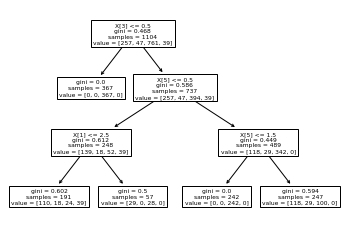

In [ ]:
# Question 3 
# Part X: compare multiple models 


# Train a model on the new training set 'car_train_new', splitting the tree 
# based on the Gini index, set any parameters for 'max_depth', and 'max_features'

# split training/test data 80:20 using sklearn 
car_train_X, car_test_X, car_train_y, car_test_y = train_test_split(X, y, test_size=0.2, random_state=42)
# split training data 80:20 to create validation set 
car_train_X_new, car_validation_X, car_train_y_new, car_validation_y = train_test_split(car_train_X, car_train_y, test_size=0.2, random_state=41)

# instantiate decision tree (GINI)
tree_reg_new = tree.DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state=42)
# train tree on new training set 
tree_reg_new = tree_reg_new.fit(car_train_X_new, car_train_y_new) 

# print model output (as requested)
tree.plot_tree(tree_reg_new) 

[Text(125.55000000000001, 190.26, 'X[3] <= 0.5\nentropy = 1.224\nsamples = 1104\nvalue = [257, 47, 761, 39]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 367\nvalue = [0, 0, 367, 0]'),
 Text(167.4, 135.9, 'X[5] <= 0.5\nentropy = 1.491\nsamples = 737\nvalue = [257, 47, 394, 39]'),
 Text(83.7, 81.53999999999999, 'X[0] <= 2.5\nentropy = 1.635\nsamples = 248\nvalue = [139, 18, 52, 39]'),
 Text(41.85, 27.180000000000007, 'entropy = 1.643\nsamples = 184\nvalue = [104, 18, 23, 39]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.994\nsamples = 64\nvalue = [35, 0, 29, 0]'),
 Text(251.10000000000002, 81.53999999999999, 'X[5] <= 1.5\nentropy = 1.097\nsamples = 489\nvalue = [118, 29, 342, 0]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(292.95, 27.180000000000007, 'entropy = 1.4\nsamples = 247\nvalue = [118, 29, 100, 0]')]

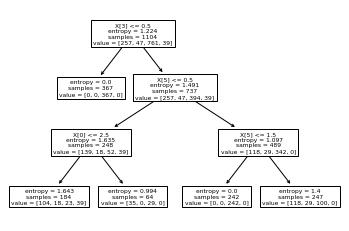

In [ ]:
# Question 3 
# Part X: compare multiple models (cont) 

# Train a model on the new training set 'car_train_new', splitting the tree 
# based on Entropy, set any parameters for 'max_depth', and 'max_features'

# instantiate decision tree (entropy)
tree_reg_new2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state=42)
# train tree on new training set 
tree_reg_new2 = tree_reg_new2.fit(car_train_X_new, car_train_y_new) 

# print model output (as requested)
tree.plot_tree(tree_reg_new2) 

In [ ]:
# Question 3 
# Part X: compare multiple models (cont)

# Evaluate the predictions based on the classification error on the validation 
# set using both models.

# GINI tree prediction 
validation_prediction_gini = tree_reg_new.predict(car_validation_X)
# Entropy tree prediction
validation_prediction_entropy = tree_reg_new2.predict(car_validation_X)

# measure GINI accuracy and print result 
gini_validation_accuracy = accuracy_score(validation_prediction_gini, car_validation_y)
print('Gini validation accuracy: \n', gini_validation_accuracy)
# measure entropy accuracy and print result 
entropy_validation_accuracy = accuracy_score(validation_prediction_entropy, car_validation_y)
print('Entropy validation accuracy: \n', entropy_validation_accuracy)

Gini validation accuracy: 
 0.7472924187725631
Entropy validation accuracy: 
 0.7472924187725631


In [ ]:
# Question 3 
# Part X: compare multiple models (cont)

# Compute and compare the test set ('car_test') classification error of the two models.

# GINI tree prediction 
test_prediction_gini = tree_reg_new.predict(car_test_X_new)
# entropy tree prediction 
test_prediction_entropy = tree_reg_new2.predict(car_test_X_new)

# measure GINI accuracy and print result 
gini_test_accuracy = accuracy_score(test_prediction_gini, car_test_y_new)
print('Gini test accuracy: \n', gini_test_accuracy)
# measure entropy accuracy and print result 
entropy_test_accuracy = accuracy_score(test_prediction_entropy, car_test_y_new)
print('Entropy test accuracy: \n', entropy_test_accuracy)


Gini test accuracy: 
 0.7803468208092486
Entropy test accuracy: 
 0.7803468208092486
